In [13]:
%load_ext autoreload
%autoreload 2
import jeulib as jl
import numpy as np
import matplotlib.pyplot as plt
import random
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
game = jl.Jeu()
game.demarrer()

Quel type de joueur souhaitez vous sélectionner pour noir ? Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>


Quel type de joueur souhaitez vous sélectionner pour blanc ?
Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>


## Random
2. Codez ensuite un Joueur Random, s´electionnant `a chaque tour avec une probabilit´e uniforme un
coup parmi ceux possibles. Vous pourrez utiliser la m´ethode liste coups valides de la classe
Plateau. Une instance de IA peut acc´eder au plateau via son attribut jeu, qui lui mˆeme a un attribut
plateau. Vous pourrez vous servir de la fonction numpy.random.randint(a,b) qui permet de tirer
un entier entre a et b − 1 inclus.

In [5]:
game2= jl.Jeu()
# Modifications dans le fichier joueurlib.py
game2.demarrer()

Quel type de joueur souhaitez vous sélectionner pour noir ? Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>
Quel type de joueur souhaitez vous sélectionner pour blanc ?
Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>
Victoire de blanc, avec 33 points contre 31.


invalid command name ".!button"
    while executing
"$w cget -state"
    (procedure "tk::ButtonDown" line 12)
    invoked from within
"tk::ButtonDown .!button"
    (command bound to event)


## Minmax
3. Comme l’arbre de jeu est trop grand pour etre entierement evalue, creez une fonction d’evaluation
d’une position (prenez quelque chose de simple pour commencer).


In [6]:
"""
Fonction d'evaluation de la position simple:
Elle compte le nombre de pions de la couleur du joueur
"""
def evaluation_position(self):
    score = 0
    for i in range(self.jeu.plateau.taille):
        for j in range(self.jeu.plateau.taille):
            if self.jeu.plateau.tableau_cases[i][j] == self.couleurval:
                score += 1
    return score


4. Implementez l’algorithme minmax en limitant la profondeur de l’exploration (vous pourrez prendre
une profondeur 5, et augmenter en fonction des capacit´es de votre machine). Vous pourrez utiliser
la m´ethode copie de la classe Plateau pour pouvoir explorer diff´erents noeuds sans impacter la
partie en cours.

In [7]:
def minmax(self, couleurval, profondeur = 3, maximiser=True):
		plateau = self.jeu.plateau.copie()
		if profondeur == 0 or not plateau.existe_coup_valide(couleurval):
			return self.fct_evaluation(plateau, couleurval), None
		if maximiser:
			M = -np.inf
			coups_possibles = plateau.liste_coups_valides(couleurval)
			argmax = None
			for coup in coups_possibles:
				plateau_apres = plateau.copie()
				plateau_apres.jouer(coup, couleurval)
				self.nb_appels_jouer += 1
				val, _ = self.minmax(-couleurval, profondeur-1,False)
				if M < val:
					M = val
					argmax = coup
			return M, argmax
		else:
			M = np.inf
			coups_possibles = plateau.liste_coups_valides(couleurval)
			argmin = None
			for coup in coups_possibles:
				plateau_apres = plateau.copie()
				plateau_apres.jouer(coup, couleurval)
				self.nb_appels_jouer += 1
				val, _ = self.minmax(-couleurval, profondeur-1,True)					
				if M > val:
					M = val
					argmin = coup
			return M, argmin

TEST du code : 

In [10]:
minmax = jl.Jeu()
# Modifications dans le fichier joueurlib.py
minmax.demarrer()

Quel type de joueur souhaitez vous sélectionner pour noir ? Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>
Quel type de joueur souhaitez vous sélectionner pour blanc ?
Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>
Victoire de noir, avec 41 points contre 23.


5. Ajoutez un compteur du nombre de fois que votre Joueur utilise la m´ethode jouer (y compris pour
l’exploration via minmax).

In [23]:
def demande_coup(self, profondeur = 4):
		start_time = time.time()
		_, meilleur_coup = self.minmax(self.couleurval,profondeur,True)
		end_time = time.time()

		self.temps_exe += end_time - start_time

		#print(f"Temps d'exécution minmax : {self.temps_exe:.2f} secondes")
		print(f"Nombre d'appels à jouer : {self.nb_jouer()}")
		#print(f"Meilleur coup : {meilleur_coup}")
		return meilleur_coup if meilleur_coup is not None else []

In [11]:
minmax_jouer = jl.Jeu()
minmax_jouer.demarrer()

Quel type de joueur souhaitez vous sélectionner pour noir ? Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>
Quel type de joueur souhaitez vous sélectionner pour blanc ?
Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>
Nombre d'appels à jouer : 120
Nombre d'appels à jouer : 1308
Nombre d'appels à jouer : 2424
Nombre d'appels à jouer : 3540
Nombre d'appels à jouer : 9453
Nombre d'appels à jouer : 16833
Nombre d'appels à jouer : 27833
Nombre d'appels à jouer : 29345
Nombre d'appels à jouer : 31452
Nombre d'appels à jouer : 32202
Nombre d'appels à jouer : 32952
Nombre d'appels à jouer : 33477
Nombre d'appels à jouer : 37173
Nombre d'appels à jouer : 40869
Nombre d'appels à jouer : 42109
Nombre d'appels à jouer : 42120
Nombre d'appels à jouer : 42130
Nombre d'appels à jouer : 42139

invalid command name ".!button"
    while executing
"$w cget -state"
    (procedure "tk::ButtonDown" line 12)
    invoked from within
"tk::ButtonDown .!button"
    (command bound to event)


6. Ajoutez ´egalement un compteur de temps physique via la librairie time.

In [12]:
minmax_jouer = jl.Jeu()
minmax_jouer.demarrer()

Quel type de joueur souhaitez vous sélectionner pour noir ? Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>
Quel type de joueur souhaitez vous sélectionner pour blanc ?
Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>
Temps d'exécution minmax : 0.39 secondes
Nombre d'appels à jouer : 120
Temps d'exécution minmax : 0.79 secondes
Nombre d'appels à jouer : 240
Temps d'exécution minmax : 7.05 secondes
Nombre d'appels à jouer : 2208
Temps d'exécution minmax : 9.01 secondes
Nombre d'appels à jouer : 2908
Temps d'exécution minmax : 12.29 secondes
Nombre d'appels à jouer : 3993
Temps d'exécution minmax : 13.70 secondes
Nombre d'appels à jouer : 4521
Temps d'exécution minmax : 14.53 secondes
Nombre d'appels à jouer : 4836
Temps d'exécution minmax : 19.46 secondes
Nombre d'appels à joue

invalid command name ".!button"
    while executing
"$w cget -state"
    (procedure "tk::ButtonDown" line 12)
    invoked from within
"tk::ButtonDown .!button"
    (command bound to event)


7. Quel int´erˆet voyez vous a avoir ces deux compteurs differents ? Comment evoluent-ils l’un par rapport a l’autre ?


La présence de ces deux compteurs est essentielle pour analyser la performance de l'algorithme sous deux angles complémentaires : le compteur d'appels à jouer mesure la complexité algorithmique en indiquant le nombre de fois que la fonction joue est appelée, évaluant ainsi l'ampleur de l'exploration de l'arbre de jeu. Le compteur de temps de calcul, quant à lui, donne une mesure concrète du temps réel mis par l'algorithme pour s'exécuter, tenant compte de la vitesse du processeur et de l'optimisation du code. En résumé, le compteur d’appels fournit une vue sur la complexité intrinsèque de la méthode, tandis que le compteur de temps traduit l’impact de cette complexité en termes de performance réelle. Lorsque la profondeur d’exploration augmente, le nombre d’appels et le temps d’exécution augmentent de manière exponentielle et non linéaire respectivement. Ces deux compteurs combinés permettent d’identifier si une optimisation réduit effectivement le temps de calcul et améliore la performance globale.

8. Tracez une courbe montrant comment les deux compteurs varient en fonction du choix de la profondeur maximale.

In [15]:
"""
8. Tracez une courbe montrant comment les deux compteurs varient en fonction du choix de la
profondeur maximale.
"""
def test_profondeur():
    profondeurs = range(1, 5) 
    temps_execution_minmax = []
    nb_appels_jouer_minmax = []
    
    for profondeur in profondeurs:
        # Initialiser une partie
        game_minmax = jl.Jeu(opts={"choix_joueurs": False})

        # Partie entre Minmax et Random
        joueur_noir_minmax = jl.Minmax(game_minmax, "noir") 
        joueur_blanc_minmax = jl.Random(game_minmax, "blanc") 


        game_minmax.noir = joueur_noir_minmax
        game_minmax.blanc = joueur_blanc_minmax
        game_minmax.joueur_courant = joueur_noir_minmax 
        game_minmax.partie_finie = False


        while not game_minmax.partie_finie:
            joueur = game_minmax.joueur_courant
            if isinstance(joueur, jl.Minmax):
                coup = joueur.demande_coup(profondeur)
            else:
                coup = joueur.demande_coup()
            game_minmax.jouer(coup) 


        # les compteurs Minmax
        temps_execution_minmax.append(joueur_noir_minmax.temps_exe)
        nb_appels_jouer_minmax.append(joueur_noir_minmax.nb_appels_jouer)


        print(f"Profondeur {profondeur} (Minmax): Temps d'exécution = {joueur_noir_minmax.temps_exe:.2f} secondes, "
              f"Nombre d'appels à jouer = {joueur_noir_minmax.nb_appels_jouer}")
    # Les plotes 
    plt.figure(figsize=(12, 12))

    # Sous-graphe pour le temps d'exécution (Minmax)
    plt.subplot(2, 1, 1)
    plt.plot(profondeurs, temps_execution_minmax, marker='o', label='Temps d\'exécution (Minmax)')
    plt.xlabel('Profondeur')
    plt.ylabel('Temps d\'exécution (secondes)')
    plt.title('Variation du Temps d\'Exécution en Fonction de la Profondeur (Minmax)')
    plt.legend()
    plt.grid(True)

    # Sous-graphe pour le nombre d'appels à jouer (Minmax)
    plt.subplot(2, 1, 2)
    plt.plot(profondeurs, nb_appels_jouer_minmax, marker='o', color='orange', label='Nombre d\'appels à jouer (Minmax)')
    plt.xlabel('Profondeur')
    plt.ylabel('Nombre d\'appels à jouer')
    plt.title('Variation du Nombre d\'Appels à Jouer en Fonction de la Profondeur (Minmax)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


Temps d'exécution minmax : 0.01 secondes
Nombre d'appels à jouer : 4
Temps d'exécution minmax : 0.03 secondes
Nombre d'appels à jouer : 8
Temps d'exécution minmax : 0.06 secondes
Nombre d'appels à jouer : 16
Temps d'exécution minmax : 0.08 secondes
Nombre d'appels à jouer : 21
Temps d'exécution minmax : 0.09 secondes
Nombre d'appels à jouer : 26
Temps d'exécution minmax : 0.10 secondes
Nombre d'appels à jouer : 31
Temps d'exécution minmax : 0.12 secondes
Nombre d'appels à jouer : 38
Temps d'exécution minmax : 0.14 secondes
Nombre d'appels à jouer : 45
Temps d'exécution minmax : 0.16 secondes
Nombre d'appels à jouer : 52
Temps d'exécution minmax : 0.18 secondes
Nombre d'appels à jouer : 61
Temps d'exécution minmax : 0.20 secondes
Nombre d'appels à jouer : 70
Temps d'exécution minmax : 0.22 secondes
Nombre d'appels à jouer : 80
Temps d'exécution minmax : 0.24 secondes
Nombre d'appels à jouer : 88
Temps d'exécution minmax : 0.26 secondes
Nombre d'appels à jouer : 100
Temps d'exécution min

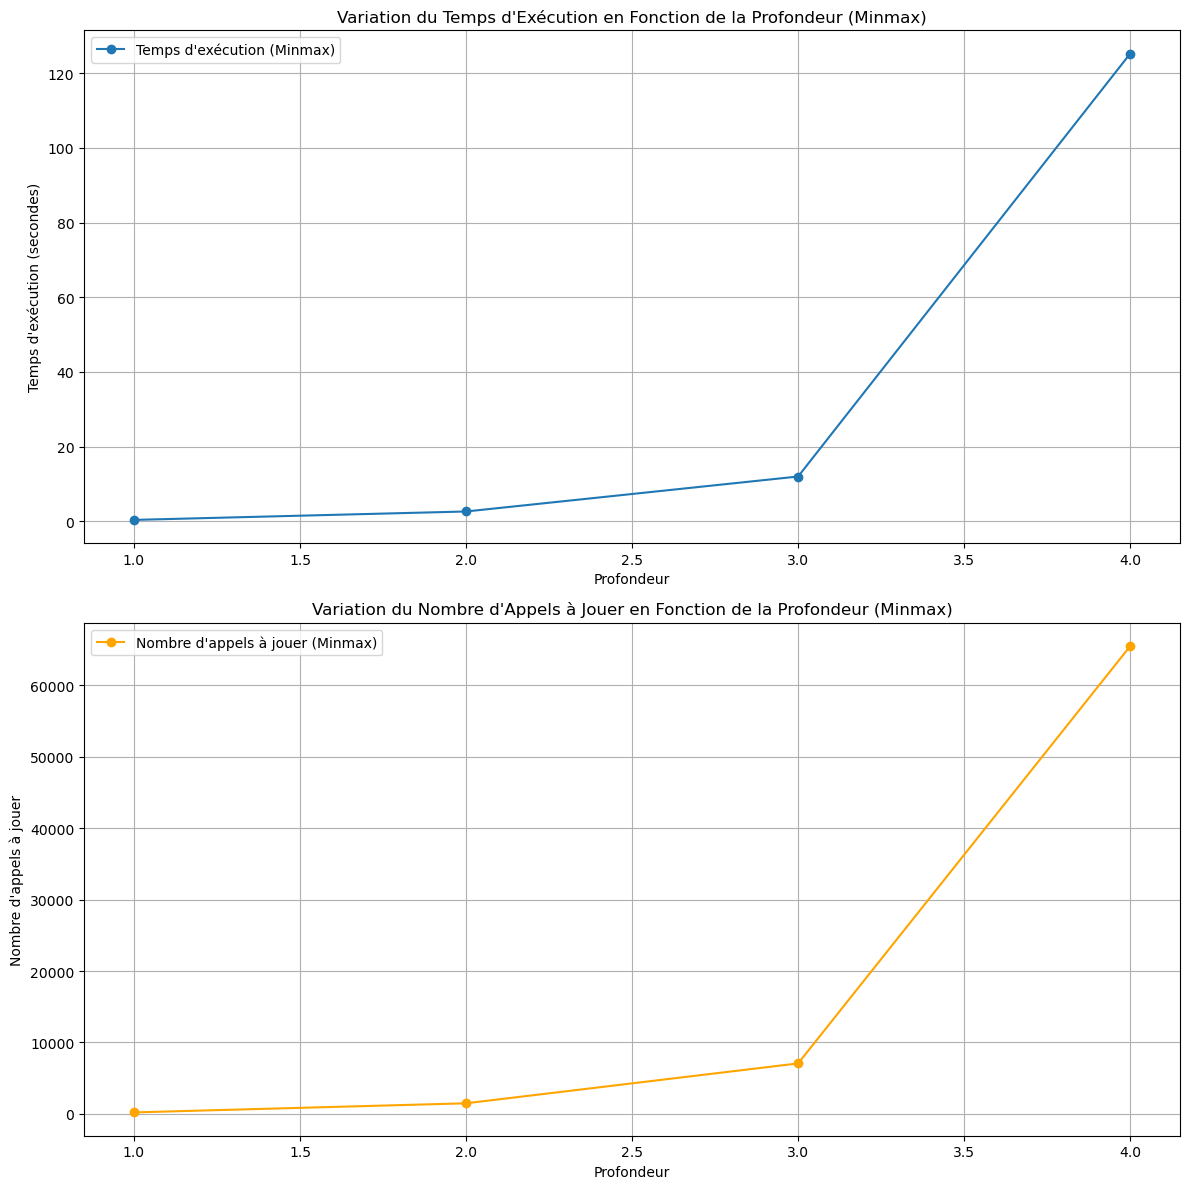

In [16]:
test_profondeur()


### 9. Ajoutez une fonction permettant de simuler n parties entre deux IA, et donnant le nombre de victoires, score moyen ainsi que le temps moyen de calcul pour chaque camp.

In [21]:
""" 
9. Ajoutez une fonction permettant de simuler n parties entre deux IA, et donnant le nombre de
victoires, score moyen ainsi que le temps moyen de calcul pour chaque camp.
"""
def simuler_parties(n, profondeur_noir=3, profondeur_blanc=3):
    victoires_noir = 0
    victoires_blanc = 0
    scores_noir = []
    scores_blanc = []
    temps_noir = []
    temps_blanc = []

    for i in range(n):
        game = jl.Jeu(opts={"choix_joueurs": False})

        joueur_noir = jl.Minmax(game, "noir")
        joueur_blanc = jl.Random(game, "blanc")

        game.noir = joueur_noir
        game.blanc = joueur_blanc
        game.joueur_courant = joueur_noir
        game.partie_finie = False

        while not game.partie_finie:
            joueur = game.joueur_courant
            if isinstance(joueur, jl.Minmax):
                coup = joueur.demande_coup(profondeur_noir if joueur.couleur == "noir" else profondeur_blanc)
            else:
                coup = joueur.demande_coup()
            game.jouer(coup)

        [victoire, score_noir, score_blanc] = game.score()
        scores_noir.append(score_noir)
        scores_blanc.append(score_blanc)
        temps_noir.append(joueur_noir.temps_exe)
        temps_blanc.append(joueur_blanc.temps_exe)

        if victoire == 1:
            victoires_noir += 1
        elif victoire == -1:
            victoires_blanc += 1

    return victoires_noir, victoires_blanc, scores_noir, scores_blanc, temps_noir, temps_blanc

def Question_9():
    total_victoires_noir = 0
    total_victoires_blanc = 0
    total_scores_noir = []
    total_scores_blanc = []
    total_temps_noir = []
    total_temps_blanc = []

    for profondeur in range(1, 4):
        print(f"Profondeur {profondeur}:")
        victoires_noir, victoires_blanc, scores_noir, scores_blanc, temps_noir, temps_blanc = simuler_parties(5, profondeur_noir=profondeur, profondeur_blanc=profondeur)
        
        print(f"Victoires Noir: {victoires_noir}, Victoires Blanc: {victoires_blanc}")
        print(f"Score moyen Noir: {np.mean(scores_noir)}, Score moyen Blanc: {np.mean(scores_blanc)}")
        print(f"Temps moyen de calcul Noir: {np.mean(temps_noir)} secondes, Temps moyen de calcul Blanc: {np.mean(temps_blanc)} secondes\n")
        
        total_victoires_noir += victoires_noir
        total_victoires_blanc += victoires_blanc
        total_scores_noir.extend(scores_noir)
        total_scores_blanc.extend(scores_blanc)
        total_temps_noir.extend(temps_noir)
        total_temps_blanc.extend(temps_blanc)

    print("\nRésultats finaux de toutes les parties jouées:")
    print(f"Total Victoires Noir: {total_victoires_noir}, Total Victoires Blanc: {total_victoires_blanc}")
    print(f"Score moyen Noir: {np.mean(total_scores_noir)}, Score moyen Blanc: {np.mean(total_scores_blanc)}")
    print(f"Temps moyen de calcul Noir: {np.mean(total_temps_noir)} secondes, Temps moyen de calcul Blanc: {np.mean(total_temps_blanc)} secondes")



In [22]:
Question_9()

Profondeur 1:
Temps d'exécution minmax : 0.01 secondes
Nombre d'appels à jouer : 4
Temps d'exécution minmax : 0.03 secondes
Nombre d'appels à jouer : 8
Temps d'exécution minmax : 0.04 secondes
Nombre d'appels à jouer : 12
Temps d'exécution minmax : 0.05 secondes
Nombre d'appels à jouer : 17
Temps d'exécution minmax : 0.07 secondes
Nombre d'appels à jouer : 24
Temps d'exécution minmax : 0.09 secondes
Nombre d'appels à jouer : 32
Temps d'exécution minmax : 0.11 secondes
Nombre d'appels à jouer : 43
Temps d'exécution minmax : 0.13 secondes
Nombre d'appels à jouer : 51
Temps d'exécution minmax : 0.16 secondes
Nombre d'appels à jouer : 62
Temps d'exécution minmax : 0.18 secondes
Nombre d'appels à jouer : 72
Temps d'exécution minmax : 0.20 secondes
Nombre d'appels à jouer : 81
Temps d'exécution minmax : 0.22 secondes
Nombre d'appels à jouer : 90
Temps d'exécution minmax : 0.24 secondes
Nombre d'appels à jouer : 100
Temps d'exécution minmax : 0.26 secondes
Nombre d'appels à jouer : 111
Temps 

### 11. Sans faire l’exp´erience, quel sera `a votre avis le r´esultat de 100 parties avec Minmax en joueur noir et Alpha-Beta en joueur blanc, et pourquoi ?

Sans faire l'expérience, je pense que sur 100 parties avec Minmax en joueur noir et Alpha-Beta en joueur blanc ca va etre une partie nulle pour une meme profondeur, sinon Alpha-Beta gagnerait probablement plus de parties. La raison est que l'algorithme Alpha-Beta est une version optimisée de Minmax. Il explore le même arbre de jeu mais coupe les branches inutiles, ce qui lui permet de trouver des coups équivalents ou meilleurs plus rapidement. En théorie, cela devrait donner un avantage à Alpha-Beta, car il peut atteindre des évaluations plus précises en moins de temps.

### 12. Comparez les performances de temps avec Minmax, en faisant varier la profondeur maximale.

In [ ]:
jl.test_profondeur()

### 14. Comparez cette nouvelle version `a l’ancienne.

In [4]:
jl.comparer_alphabeta()

Profondeur 1 (AlphaBeta):
Temps d'exécution : 0.01 secondes
Temps d'exécution : 0.02 secondes
Temps d'exécution : 0.04 secondes
Temps d'exécution : 0.05 secondes
Temps d'exécution : 0.06 secondes
Temps d'exécution : 0.08 secondes
Temps d'exécution : 0.10 secondes
Temps d'exécution : 0.12 secondes
Temps d'exécution : 0.14 secondes
Temps d'exécution : 0.16 secondes
Temps d'exécution : 0.18 secondes
Temps d'exécution : 0.19 secondes
Temps d'exécution : 0.21 secondes
Temps d'exécution : 0.23 secondes
Temps d'exécution : 0.25 secondes
Temps d'exécution : 0.27 secondes
Temps d'exécution : 0.28 secondes
Temps d'exécution : 0.28 secondes
Temps d'exécution : 0.29 secondes
Temps d'exécution : 0.30 secondes
Temps d'exécution : 0.32 secondes
Temps d'exécution : 0.33 secondes
Temps d'exécution : 0.34 secondes
Temps d'exécution : 0.35 secondes
Temps d'exécution : 0.35 secondes
Temps d'exécution : 0.35 secondes
Temps d'exécution : 0.36 secondes
Temps d'exécution : 0.36 secondes
Temps d'exécution : 0.

Victoire de noir, avec 43 points contre 21.
Victoires Noir: 5, Victoires Blanc: 0
Score moyen Noir: 43.6, Score moyen Blanc: 19.6
Temps moyen de calcul Noir: 4.8677606105804445 secondes, Temps moyen de calcul Blanc: 0.0 secondes


Résultats finaux de toutes les parties jouées (AlphaBeta Optimisé):
Total Victoires Noir: 10, Total Victoires Blanc: 0
Score moyen Noir: 43.8, Score moyen Blanc: 18.8
Temps moyen de calcul Noir: 2.87998480796814 secondes, Temps moyen de calcul Blanc: 0.0 secondes


On remarque que la version optimisé a un temps moyen de calcul moins important que la version non optimisé